<a href="https://colab.research.google.com/github/sebaspv/99-ML-Learning-Projects/blob/master/titanic_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [25]:
def sex_binary(sex):
  if sex == 'male':
    return 0
  elif sex == 'female':
    return 1
train['Sex'] = train['Sex'].map(lambda x: sex_binary(x))

In [26]:
embarked = pd.get_dummies(train['Embarked'])
train = pd.concat([train,embarked],axis=1)
train = train.drop('Embarked',axis=1)
train = train.drop('Ticket',axis=1)
train = train.drop('Cabin',axis=1)
train = train.drop('Name',axis=1)
cat_age = pd.get_dummies(train['Age'])
train = pd.concat([train,cat_age],axis=1)

In [27]:
train = train.dropna(axis=1,how='any')
test = test.dropna(axis=1,how='any')

In [28]:
model = Sequential()
model.add(Dense(104,activation='relu'))
model.add(Dense(52,activation='relu'))
model.add(Dense(27,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')

In [29]:
train_y = train['Survived'] 
train_X = train.drop('Survived',axis=1)

In [30]:
scaler = MinMaxScaler()
scaler.fit(train_X)
X_train = scaler.transform(train_X)

In [31]:
model.fit(x=X_train, 
          y=train_y, 
          epochs=100,
          batch_size=128,
          )

Epoch 1/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6688
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6311
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.5906
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 0.5425
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4962
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4576
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4355
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4202
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4053
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3934
Epoch 11/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3825
Epoch 12/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3710
Epoch 13/100
7/7 [==============================] - 0s 2ms/st

In [32]:
predictions = (model.predict(X_train) > 0.5).astype("int32")

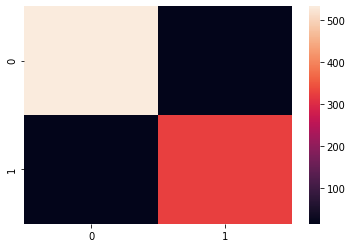

In [33]:
sns.heatmap(confusion_matrix(train_y,predictions))

In [34]:
print(classification_report(train_y,predictions))
#Our model has a 95% accuracy over the train set

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       549
           1       0.95      0.95      0.95       342

    accuracy                           0.96       891
   macro avg       0.96      0.96      0.96       891
weighted avg       0.96      0.96      0.96       891



In [35]:
print(confusion_matrix(train_y,predictions))

[[533  16]
 [ 16 326]]
